<h1> Haiti 1 - Loading and Exploring Haiti Data </h1>

Welcome to the first practice lab of this specialization! In this notebook, you will look at the text messages that were collected and translated into English during the 2010 Haiti earthquake. The dataset contains not only the Haiti messages, but also messages collected during and after the floods in Pakistan, huricane Sandy in the USA and some news articles. To learn more about the project or the data, take a look at this [GitHub Repository](https://github.com/rmunro/disaster_response_messages)


**In this lab you will apply the following steps:**
1. Import Python packages
2. Inspect the dataset
3. Explore the "related" feature
4. Explore the "offer and request" feature
5. Explore the dataset date range
6. Visualize the frequently used words from the DataFrame using WordCloud

<a name='1'></a>
## 1. Import Python packages

Let's start by loading the packages. Run the next cell to import the Python packages you'll be using in this lab exercise. This is a common first step whenever working with Python. If everything goes well you should see a message when the cell has finished running that says "All packages imported successfully!".

Note the `import utils` line. This line imports the functions that were specifically written for this lab. If you want to look at what these functions are, go to `File -> Open...` and open the `utils.py` file to have a look.

In [1]:
import pandas as pd

import utils

print('All packages imported successfully!')

All packages imported successfully!


<a name='2'></a>
## 2. Inspect the dataset

In this lab you will mainly focus on the text messages that were collected and translated into English during the **2010 Haiti earthquake**.

### 2.1 Load the dataset

In [2]:
# Load the datasets
training_data = pd.read_csv("data/disaster_response_training.csv", low_memory=False)
validation_data = pd.read_csv("data/disaster_response_validation.csv", low_memory=False)
test_data = pd.read_csv("data/disaster_response_test.csv", low_memory=False)

# Merge the three datasets
full_data = training_data.append(validation_data).append(test_data)

# Fix the column data type
full_data['original'] = full_data['original'].astype(str)

# Count the number of rows in the training dataset
print(f'Total number of rows in training dataset: {len(full_data.index)}')

# Show the first few rows of data
full_data.head()

Total number of rows in training dataset: 23850


,id,split,message,original,genre,related,PII,request,offer,aid_related,...,floods,storm,fire,earthquake,cold,other_weather,direct_report,event,actionable_haiti,date_haiti
0,2,train,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,haiti_earthquake,0.0,2010-02-09
1,7,train,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,...,0,1,0,0,0,0,0,haiti_earthquake,0.0,2010-01-17
2,12,train,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,haiti_earthquake,0.0,2010-01-17
3,14,train,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,haiti_earthquake,0.0,2010-01-17
4,15,train,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,...,0,1,0,0,0,0,0,haiti_earthquake,0.0,2010-01-17


<a name='2-2'></a>
### 2.2 - Look at the columns in the dataset

In [3]:
full_data.columns

Index(['id', 'split', 'message', 'original', 'genre', 'related', 'PII',
       'request', 'offer', 'aid_related', 'medical_help', 'medical_products',
       'search_and_rescue', 'security', 'military', 'child_alone', 'water',
       'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees',
       'death', 'other_aid', 'infrastructure_related', 'transport',
       'buildings', 'electricity', 'tools', 'hospitals', 'shops',
       'aid_centers', 'other_infrastructure', 'weather_related', 'floods',
       'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report',
       'event', 'actionable_haiti', 'date_haiti'],
      dtype='object')

There are **38** categories, plus the messages themselves and (for Haiti only) the dates of the messages.

The categories are hierarchical, with sub-categories for `aid_related`, `infrastructure_related`, and `weather_related`.

- `id`: Unique ID number for the messages. The IDs are in (roughly) the order that the messages were written.
- `split`: training, validation or test which should correlate with the files the data is shared in.
- `message`: the English message
- `original`: in the case of non-English messages in Haiti and Pakistan, the original message before translation
- `related`: 0, 1 or 2, whether the message is related to a disaster (`1` == yes, `0` == no, `2` == unsure)
- `request`: 0 or 1, whether the message is a request for aid
- `offer`: 0 or 1, whether the message is offering help
- `event`: which event, `haiti_earthquake`, `pakistan_floods`, `usa_sandy`, or `NULL`
- `date_haiti`: `YYYY-MM-DD` or `null`, the date the message was sent (Haiti only)
- `PII`: 0 or 1, whether the message contains personal identifying information

For a detailed description and list of all categories, check out the [disaster response messages GitHub repository](https://github.com/rmunro/disaster_response_messages)

<a name='2-3'></a>
### 2.3 - Look whether the data contains sensitive information (PII - personal identifying information)
In the column `PII`, there is information, whether each row contains any personal identifying information. This dataset has been pre-cleaned, so it should only contain zeroes.

In [4]:
full_data.PII.unique()

array([0])

<a name='2-4'></a>
### 2.4 - Look at the events
Now you can look at what events does the data contain. The information is stored in the `event` column.

In [5]:
full_data.event.unique()

array(['haiti_earthquake', 'usa_sandy', 'pakistan_floods', nan],
      dtype=object)

As you can see the data belongs to four categories:
- `haiti_earthquake`: SMS messages sent to disaster reporting services following the Haiti earthquake.
- `usa_sandy`: Posts from an online disaster-related message board after hurricane Sandy.
- `pakistan_floods`: SMS messages sent to disaster reporting services following the Pakistan floods.
- `nan`: Data from news articles.

Because only the Haiti data has the date column, you will use the Haiti data to perform the analysis from now on. Feel free to look at other data as well (by changing the code below), but because of some missing data for other events, you may encounter errors and have to change the code a bit if you do that.

In [6]:
# Select only the Haiti data
haiti_df = full_data[full_data.event == 'haiti_earthquake']

# Fixing column data type
haiti_df['actionable_haiti'] = haiti_df.actionable_haiti.astype('int64')
haiti_df['date_haiti'] = pd.to_datetime(haiti_df.date_haiti)

# Count the number of rows in the Haiti dataset
print(f'Total number of rows in Haiti dataset: {len(haiti_df.index)}')

Total number of rows in Haiti dataset: 9902


Check if any of the columns contain null values.

In [7]:
haiti_df.isna().sum()

id                        0
split                     0
message                   0
original                  0
genre                     0
related                   0
PII                       0
request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
security                  0
military                  0
child_alone               0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
refugees                  0
death                     0
other_aid                 0
infrastructure_related    0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
aid_centers               0
other_infrastructure      0
weather_related           0
floods              

You can see there are no missing values, which is good news.

## 3. Explore the "related" feature

The **related** feature has three values 0, 1, or 2, and represents whether the message is related to a disaster. 0 == no, 1 == yes, 2 == unsure

### 3.1 Visualize the distrbution of messages

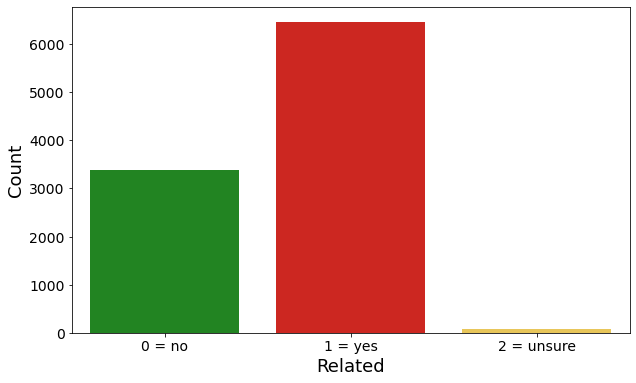

In [8]:
utils.messages_distribution(haiti_df)

### 3.2 Look at examples of related and un-related messages

Look at some messages considered related or non-related to disaster. 
You can use the dropdown menu to change the value of `haiti_df.related` to view the different categorization of `related` messages as well as select only a part of data to show, based on other categories.
* `0`: not related to disaster
* `1`: related to disaster
* `2`: unsure

In [9]:
utils.show_messages(haiti_df)

Message 1:
Original:
    Noubezwen. de nan kabar. paske se nan lari nap demi noubezwen prela.
English:
    We need help in Cabaret because we are sleeping in the street and we need shelter.

Message 2:
Original:
    n ede'n nan sant kote'm ye a gen pre de 200 moun adres nou se egliz de Dye mision evanglik tnye lavale de jakmel mesi nou konte sou konpreansyon'w mesi
English:
    .. help us in the centre where we are there are about 200 people. The address is glise Dieu Mission evangelique ? in the Jacmel Valee. Thank you. We are counting on your understanding. Thank you 

Message 3:
Original:
    Digicel tanpri m ap mande ou aide nan nenpot fason pou kenskof guibert 67 nou 350 ki sinistre tanpri se guibert 67 nan kenskof tanpri n ap mouri grangou
English:
    We are 350 survivors in kenskof in guibert 67. We are starving.

Message 4:
Original:
    KIJAN POU JENN yon tante S P V
English:
    how can I find a shelter tent? please 

Message 5:
Original:
    Nan premye seksyon senlwidino no

## 4. Explore the "offer and request" feature

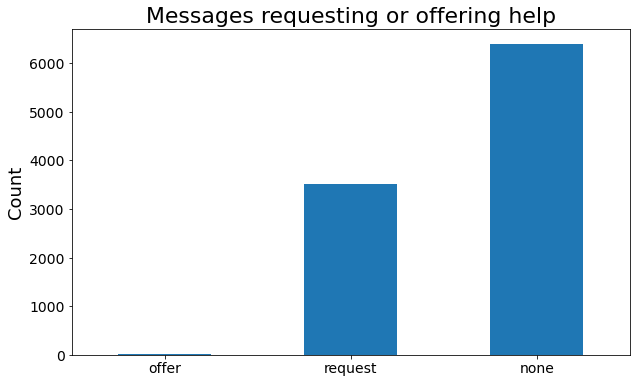

In [10]:
utils.interact_with_filters(utils.offer_request, haiti_df)

## 5. Explore the dataset date range

### 5.1 - Check the number of messages per day
Choose from various topics to see the time dependence of message frequency.

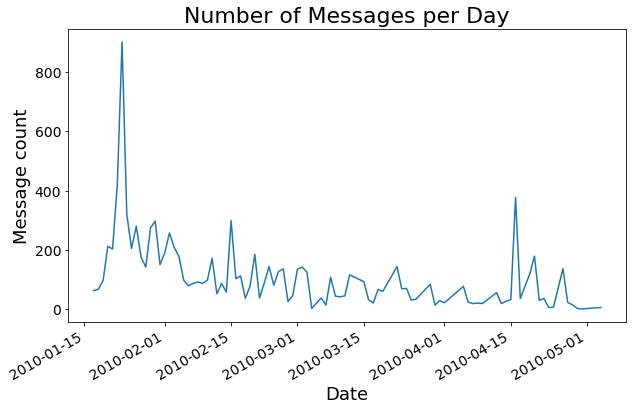

In [11]:
utils.interact_with_filters(utils.daily_plot, haiti_df)

### 5.2 - Check the number of messages per month

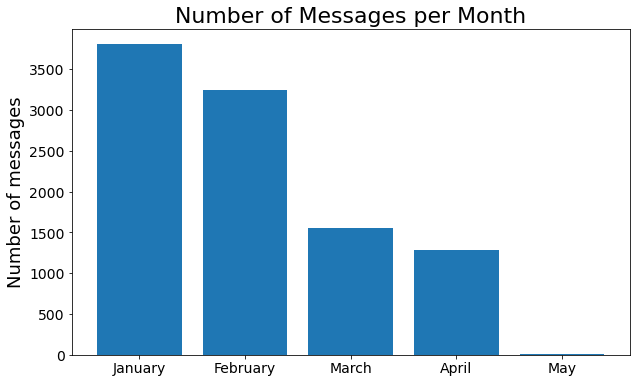

In [12]:
utils.interact_with_filters(utils.monthly_histogram, haiti_df)

## 6. Visualize the frequently used words from the DataFrame using WordCloud

Wordcloud of messages translated to English:


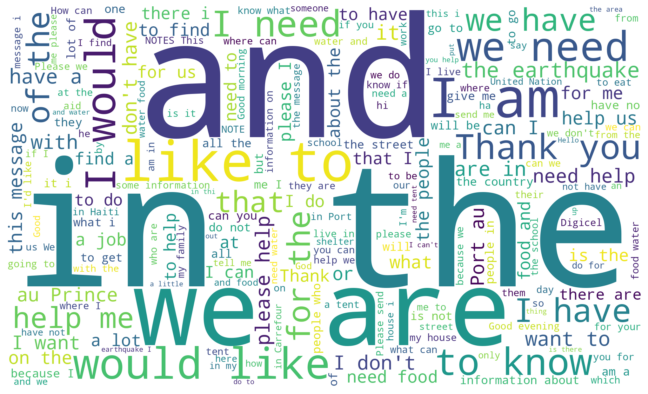

Wordcloud of original messages:


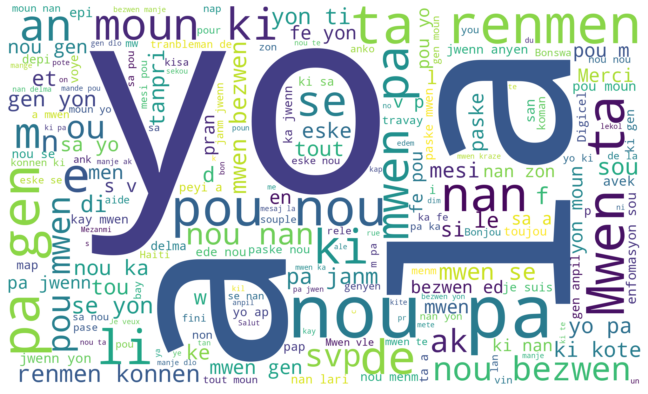

In [13]:
utils.interact_with_filters(utils.plot_wordclouds, haiti_df, remove_stopwords=False)

## Conclusion

Congratulations! You made it to the end of the first lab in this project and have a far better grasp of what your data contains and the general process for text data exploration! 

Citation:
- Robert Munro. 2012. Processing short message communications in low-resource languages. [PhD dissertation, Stanford University]. Stanford Digital Repository. Retrieved from https://purl.stanford.edu/cg721hb0673